# Question 4 예측 모델을 돌려보자!!

## 데이터 로드

In [1]:
import pandas as pd

df = pd.read_csv("./preprocessing_q4.csv")
df.head()

,Unnamed: 0,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
0,0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,...,0,0,0,0,1,0,0,0,0,0
1,1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,...,0,0,0,0,0,0,0,0,1,0
2,2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,...,0,0,0,0,1,0,0,0,0,0
3,3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,...,0,0,0,0,1,0,0,0,0,0
4,4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,...,0,0,0,1,0,0,0,0,0,0


In [2]:
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.describe()

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
count,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.0,...,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000
mean,3.857323,4.331202,74.562815,0.004492,1018.411966,8.675928,14.513312,11.815584,179.663974,2015.0,...,0.049057,0.028685,0.075401,0.028451,0.024470,0.138391,0.014401,0.062171,0.023065,0.048121
std,11.351268,12.370641,18.280534,0.037346,7.438663,11.739865,3.839898,8.466212,120.084638,0.0,...,0.216001,0.166930,0.264053,0.166267,0.154513,0.345330,0.119144,0.241479,0.150119,0.214034
min,-32.200000,0.000000,16.000000,0.000000,995.000000,-28.800000,0.100000,0.500000,0.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.800000,0.000000,62.000000,0.000000,1013.300000,0.000000,16.100000,5.600000,80.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,77.000000,0.000000,1018.300000,10.000000,16.100000,11.100000,180.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.300000,0.000000,90.000000,0.000000,1023.200000,18.300000,16.100000,16.700000,300.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.800000,64.800000,100.000000,1.430000,1044.400000,33.800000,16.100000,48.200000,360.000000,2015.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# train, test 데이터 분리 & 정규화

In [4]:
ml_cols = df.columns.tolist()
target_cols = ["ciara/sqm", "cesar/sqm"]
for i in target_cols:
    ml_cols.remove(i)
ml_cols

['Dew PointC',
 'Gust SpeedKm/h',
 'Humidity',
 'Precipitationmm',
 'Sea Level PressurehPa',
 'TemperatureC',
 'VisibilityKm',
 'Wind SpeedKm/h',
 'WindDirDegrees',
 'year',
 'month',
 'day',
 'hour',
 'Conditions_Blowing Snow',
 'Conditions_Clear',
 'Conditions_Fog',
 'Conditions_Haze',
 'Conditions_Heavy Rain',
 'Conditions_Heavy Snow',
 'Conditions_Heavy Thunderstorms and Rain',
 'Conditions_Ice Crystals',
 'Conditions_Light Freezing Fog',
 'Conditions_Light Freezing Rain',
 'Conditions_Light Rain',
 'Conditions_Light Rain Showers',
 'Conditions_Light Snow',
 'Conditions_Light Snow Showers',
 'Conditions_Light Thunderstorms and Rain',
 'Conditions_Mist',
 'Conditions_Mostly Cloudy',
 'Conditions_Overcast',
 'Conditions_Partly Cloudy',
 'Conditions_Patches of Fog',
 'Conditions_Rain',
 'Conditions_Scattered Clouds',
 'Conditions_Small Hail',
 'Conditions_Snow',
 'Conditions_Thunderstorm',
 'Conditions_Thunderstorms and Rain',
 'Conditions_Unknown',
 'Events_Fog',
 'Events_Fog-Rain',


In [5]:
import warnings
warnings.filterwarnings("ignore")

## 모델 선택
* target 값이 continuous value 라서 Regression 회귀 모델을 사용해 예측
* r2 score로 간단하게 적합도 측정

In [6]:
def train_r2(model, ml_cols, target_col):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score

    X_train, X_test, y_train, y_test = train_test_split(df[ml_cols], df[target_col], test_size=0.2,
                                                    shuffle=True, random_state=0)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    score = r2_score(y_test, preds)
    return print("{}의 r2 score은 : ".format(model), score)

### KNN

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
train_r2(knn_model, ml_cols, "ciara/sqm")

KNeighborsRegressor()의 r2 score은 :  0.40539434799107643


### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
train_r2(dt_model, ml_cols, "ciara/sqm")

DecisionTreeRegressor()의 r2 score은 :  0.6777913893868684


### Random Forest REgressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_r2(rf_model, ml_cols, "ciara/sqm")

RandomForestRegressor()의 r2 score은 :  0.8368799164225751


random forest 모델이 가장 적합도가 높음!!
나머지 cesar lab 결과 확인

In [10]:
train_r2(rf_model, ml_cols, "cesar/sqm")

RandomForestRegressor()의 r2 score은 :  0.7884192878242009


class_ciara와 lab_cesar의 적합도 차이가 대략 5% 정도 차이가 있음 각 공간별로 월별 에너지 변화를 확인해보자

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["seaborn-white"])

# 월 기준으로 에너지 평균 값 시각화
def time_avg(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    df_plot = dataframe.groupby(time).mean().reset_index()
    # max_val = np.ceil(max(max(df["ciara/sqm"]), max(df["cesar/sqm"])))

    g1 = sns.barplot(data=df_plot, ax=ax[0], x=time, y="ciara/sqm")
    # for p in g1.patches:
    #     g1.annotate('%.00f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
    #                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    plt.ylim(0, 0.02)

    g2 = sns.barplot(data=df_plot, ax=ax[1], x=time, y="cesar/sqm")
    # for p in g2.patches:
    #     g2.annotate('%.00f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
    #                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    plt.ylim(0, 0.02)

    ax[0].set_title("ciara/sqm")
    ax[1].set_title("cesar/sqm")

    plt.show()

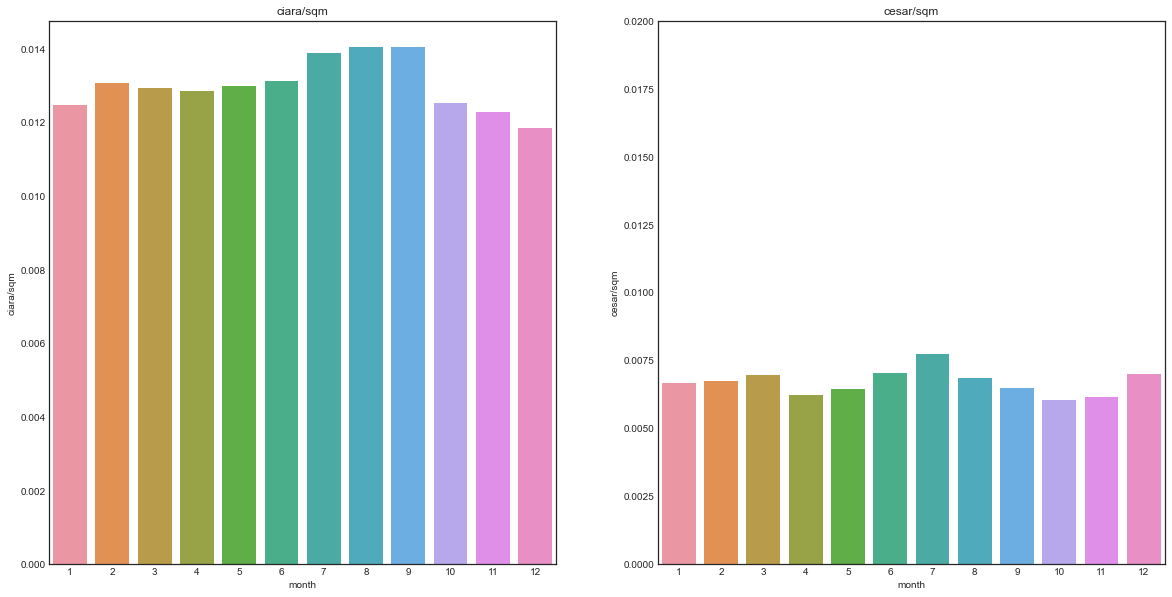

In [23]:
time_avg("month", df)

In [30]:
def time_avg_box(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # max_val = np.ceil(max(max(df["ciara/sqm"]), max(df["cesar/sqm"])))

    sns.boxplot(data=dataframe, ax=ax[0], x=time, y="ciara/sqm")

    sns.boxplot(data=dataframe, ax=ax[1], x=time, y="cesar/sqm")


    ax[0].set_title("ciara/sqm")
    ax[1].set_title("cesar/sqm")

    plt.ylim(0, 0.02)
    plt.show()

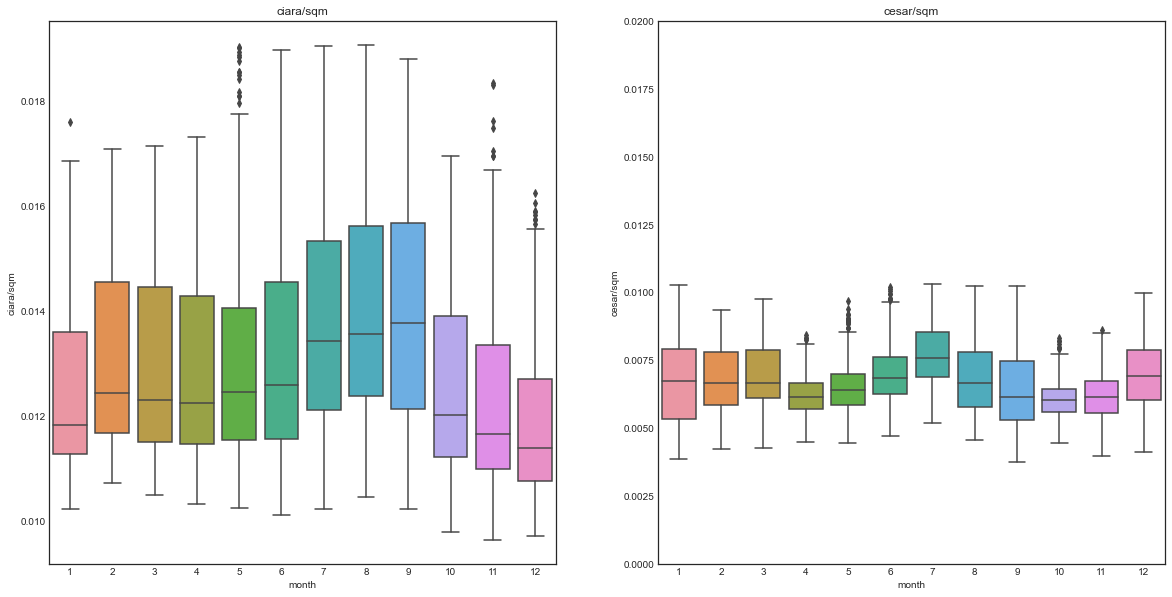

In [31]:
time_avg_box("month", df)

위의 boxplot을 보면 class_ciara와 lab_cesar의 자료 분산 정도의 차이가 있음 -> 자료의 구성형태에 따라 적합도에 영향을 미칠 수 있음을 확인
앞서 r2score 결정계수로 적합도를 평가했는데 결정계수는 자료의 구성형태에 따라 값이 결정되는 특성이 있어 통계모델의 정확성에 관한 절대지표로 사용되지 않는다.

좀 더 정확한 모델 성능평가를 위해 rmsle의 모델 성능평가 진행해보았음

## 모델 성능평가
RMSLE 평가를 위해 컬럼 추가

In [32]:
df

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,2015,...,0,0,0,0,1,0,0,0,0,0
1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,2015,...,0,0,0,0,0,0,0,0,1,0
2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,2015,...,0,0,0,0,1,0,0,0,0,0
3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,2015,...,0,0,0,0,1,0,0,0,0,0
4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,2015,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,-1.0,0.0,100.0,0.0,1019.2,-1.0,16.1,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0
8537,-2.0,0.0,93.0,0.0,1019.2,-1.0,8.0,13.0,330,2015,...,0,0,0,0,0,0,0,0,0,0
8538,-1.0,0.0,100.0,0.0,1019.5,-1.0,6.4,14.8,330,2015,...,0,0,0,0,0,0,0,0,0,0
8539,-1.0,0.0,100.0,0.0,1019.2,-1.0,6.4,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df['ciara/sqm_log'] = np.log(df['ciara/sqm'] + 1)
df['cesar/sqm_log'] = np.log(df['cesar/sqm'] + 1)

<img src="./rmsle.png" width="500" height="100"/>

In [34]:
def get_rmsle(y_actual, y_pred):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [35]:
ml_cols = df.columns.tolist()
target_cols = ["ciara/sqm", "cesar/sqm", "ciara/sqm_log", "cesar/sqm_log"]
for i in target_cols:
    ml_cols.remove(i)
ml_cols

['Dew PointC',
 'Gust SpeedKm/h',
 'Humidity',
 'Precipitationmm',
 'Sea Level PressurehPa',
 'TemperatureC',
 'VisibilityKm',
 'Wind SpeedKm/h',
 'WindDirDegrees',
 'year',
 'month',
 'day',
 'hour',
 'Conditions_Blowing Snow',
 'Conditions_Clear',
 'Conditions_Fog',
 'Conditions_Haze',
 'Conditions_Heavy Rain',
 'Conditions_Heavy Snow',
 'Conditions_Heavy Thunderstorms and Rain',
 'Conditions_Ice Crystals',
 'Conditions_Light Freezing Fog',
 'Conditions_Light Freezing Rain',
 'Conditions_Light Rain',
 'Conditions_Light Rain Showers',
 'Conditions_Light Snow',
 'Conditions_Light Snow Showers',
 'Conditions_Light Thunderstorms and Rain',
 'Conditions_Mist',
 'Conditions_Mostly Cloudy',
 'Conditions_Overcast',
 'Conditions_Partly Cloudy',
 'Conditions_Patches of Fog',
 'Conditions_Rain',
 'Conditions_Scattered Clouds',
 'Conditions_Small Hail',
 'Conditions_Snow',
 'Conditions_Thunderstorm',
 'Conditions_Thunderstorms and Rain',
 'Conditions_Unknown',
 'Events_Fog',
 'Events_Fog-Rain',


In [36]:
def train_rmsle(model, ml_cols, target_col):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    X_train, X_test, y_train, y_test = train_test_split(df[ml_cols], df[target_col], test_size=0.2,
                                                    shuffle=True, random_state=0)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    score = get_rmsle(y_test, preds)
    return print("{}의 rmsle 값은 : ".format(model), score)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_rmsle(rf_model, ml_cols, "ciara/sqm_log")

RandomForestRegressor()의 rmsle 값은 :  0.0007524189437297763


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_rmsle(rf_model, ml_cols, "cesar/sqm_log")

RandomForestRegressor()의 rmsle 값은 :  0.0005425900464561414


RMSLE 성능평가를 진행해보니 class와 lab의 성능차이가 거의 0.0002로 거의 없는 것을 확인할 수 있다.
동일한 날씨데이터로 처리된 모델의 경우 어느정도 비슷한 정확도로 에너지 사용량을 예측할 수 있음을 확인.
결론
면적 대비 에너지 사용량을 예측하는 모델을 만들었고 동일한 날씨 데이터를 가진 두 공간(ciara와 Cesar)의 에너지 사용량 예측 모델 성능을 비교했다.
3가지 회귀 모델 중 RandomForest 회귀모델이 가장 예측 성능이 높았으며, r2 결정계수를 통한 적합도로는 데이터의 특성에따라 차이가 날 수 있기 때문에
제대로 된 회귀 모델 성능평가를 위해서는 RMSLE 성능평가가 필요함을 확인했다.
